
## Demonstration of rescaled equations


To avoid tricky float epsilon issues, it is desireable to rescale our equations from their original form to a new for as follows


$$ \frac{df'}{dt} = -\gamma f'  + \xi$$

$$ f_M = (1-X) f' - X f_{EM} + N$$




Lets implement this into our pipeline and check if our Kalman filter still works and if we can still infer the states.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [3]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

### 1. Canonical example system 

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


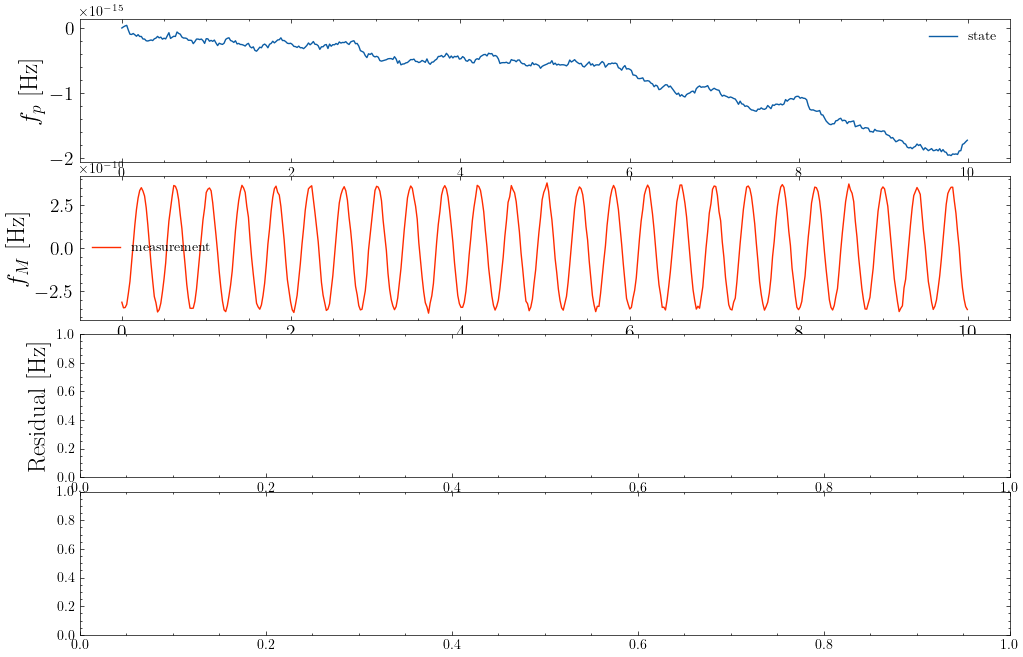

Mean residual: -4.3941741778279497e-13


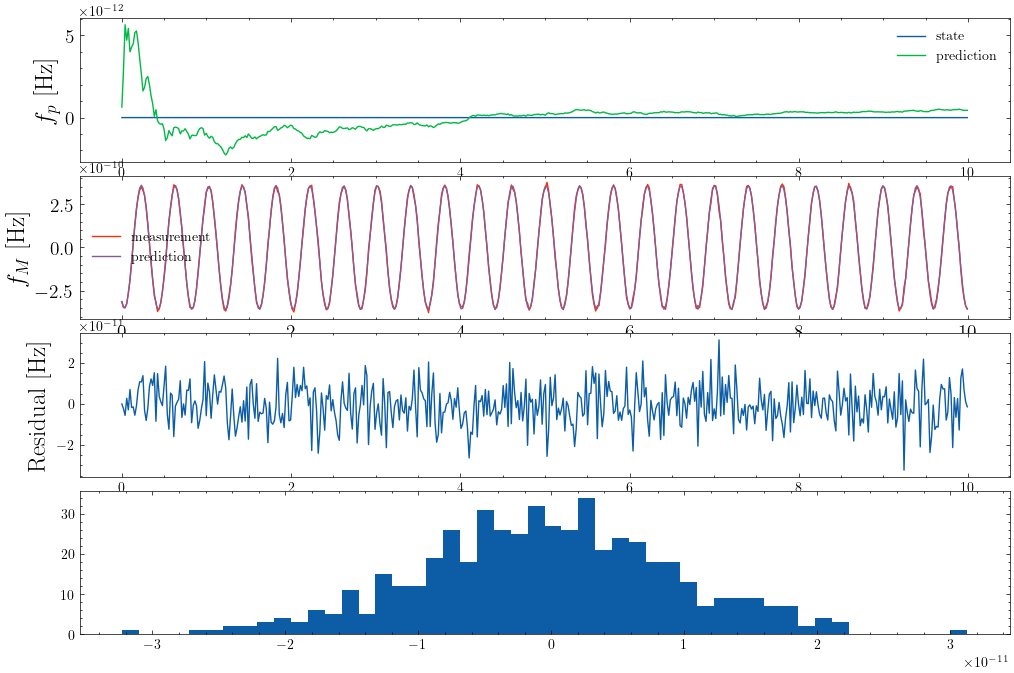

In [18]:
import logging 
logging.basicConfig(level=logging.INFO,
                    force = True)


P   = SystemParameters(h=1e-12,σp=None,σm=1e-11)
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)


model_likelihood,xp,yp = KF.likelihood(guessed_parameters)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, None,None, 1,savefig=None)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xp,yp, 1,savefig=None)



In [19]:
model_likelihood

585661.7204894383

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Attention: You are including the PSR terms in your synthetic data generation


Mean residual: -8.046885999954172e-12


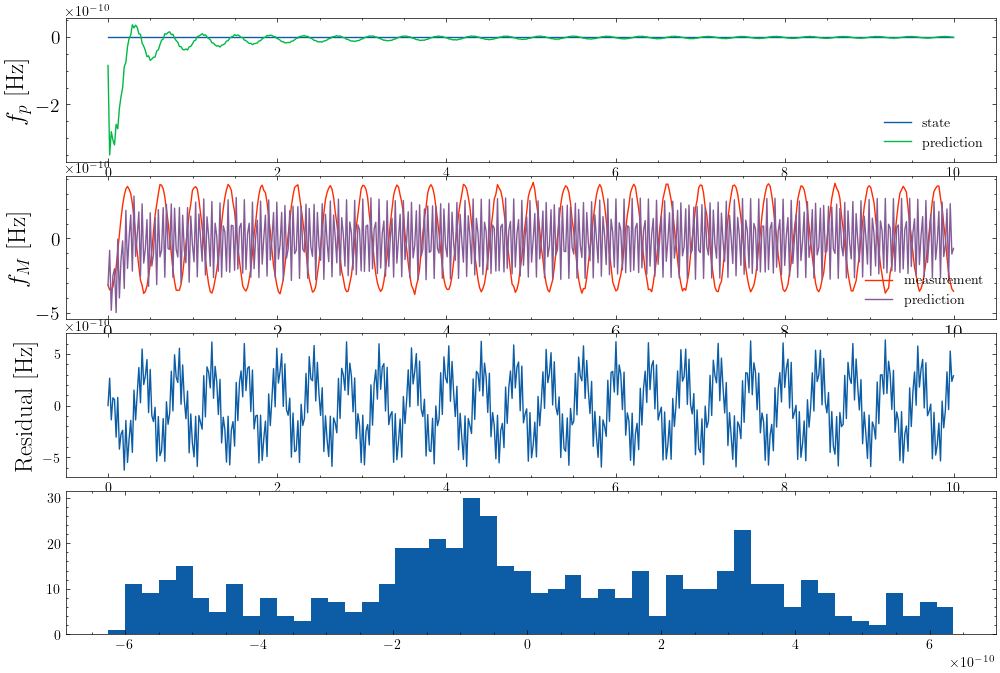

In [94]:
P   = SystemParameters(h=1e-12,σp=1e-20,σm=1e-11)
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
guessed_parameters["omega_gw"] = guessed_parameters["delta_gw"]*1.053435
model_likelihood,xp,yp = KF.likelihood(guessed_parameters)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xp,yp, 1,savefig=None)



# Likelihood curves

In [11]:
from plotting import iterate_over_priors


import matplotlib.pyplot as plt 
def plot_likelihood(x,y,x_logscale,y_logscale,variable_name,x_critical,savefig):

    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)

    ax.plot(x,y)

    if x_logscale:
        ax.set_xscale('log')
    if y_logscale:
        ax.set_yscale('log')

    ax.axvline(x_critical,linestyle='--', c='C2')

    ax.set_xlabel(variable_name)
    ax.set_ylabel("likelihood")


    if savefig != None:
        plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)

    plt.show()



In [15]:
P   = SystemParameters(h=1e-12,σp=None,σm=1e-11,measurement_model="pulsar")
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)
guessed_parameters = priors_dict(PTA,P)

In [16]:
from plotting import iterate_over_priors

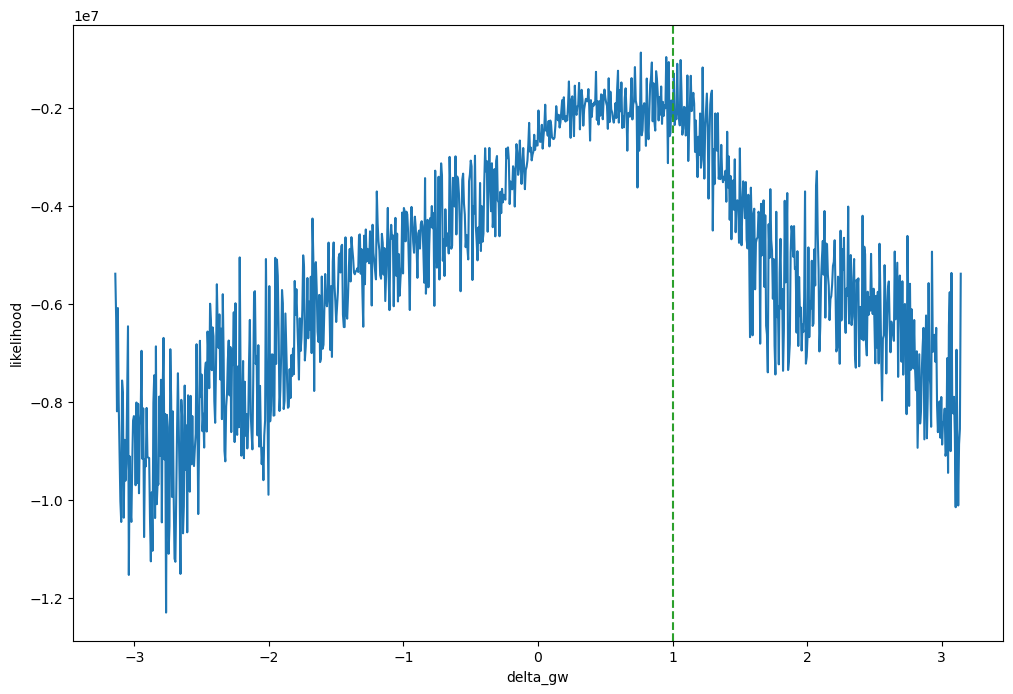

In [17]:
import numpy as np 
variable = "delta_gw"
variable_range = np.linspace(-np.pi,np.pi,int(1e3))
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable],savefig='likelihood_delta_1')
